In [114]:
import cv2

In [181]:
image = cv2.imread("voropaeva.jpg")

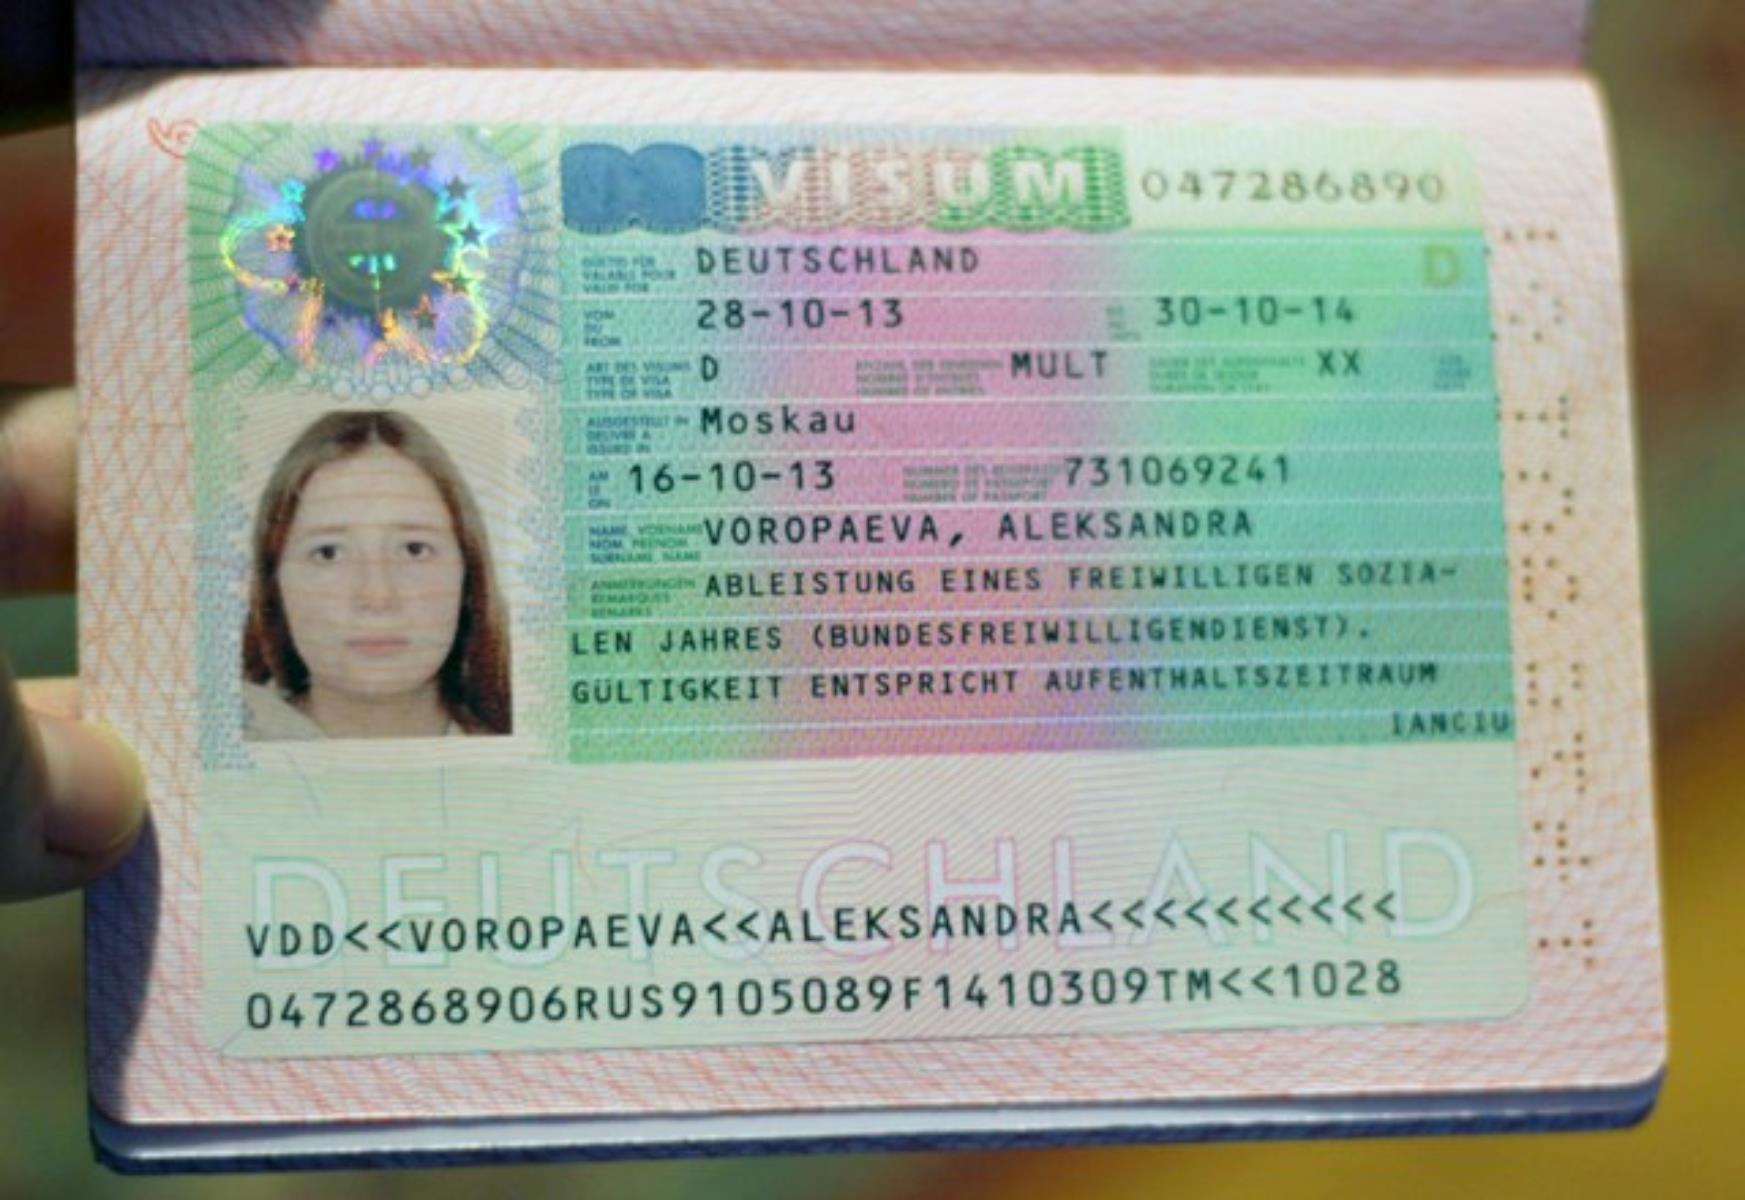

In [182]:
from google.colab.patches import cv2_imshow

cv2_imshow(image)

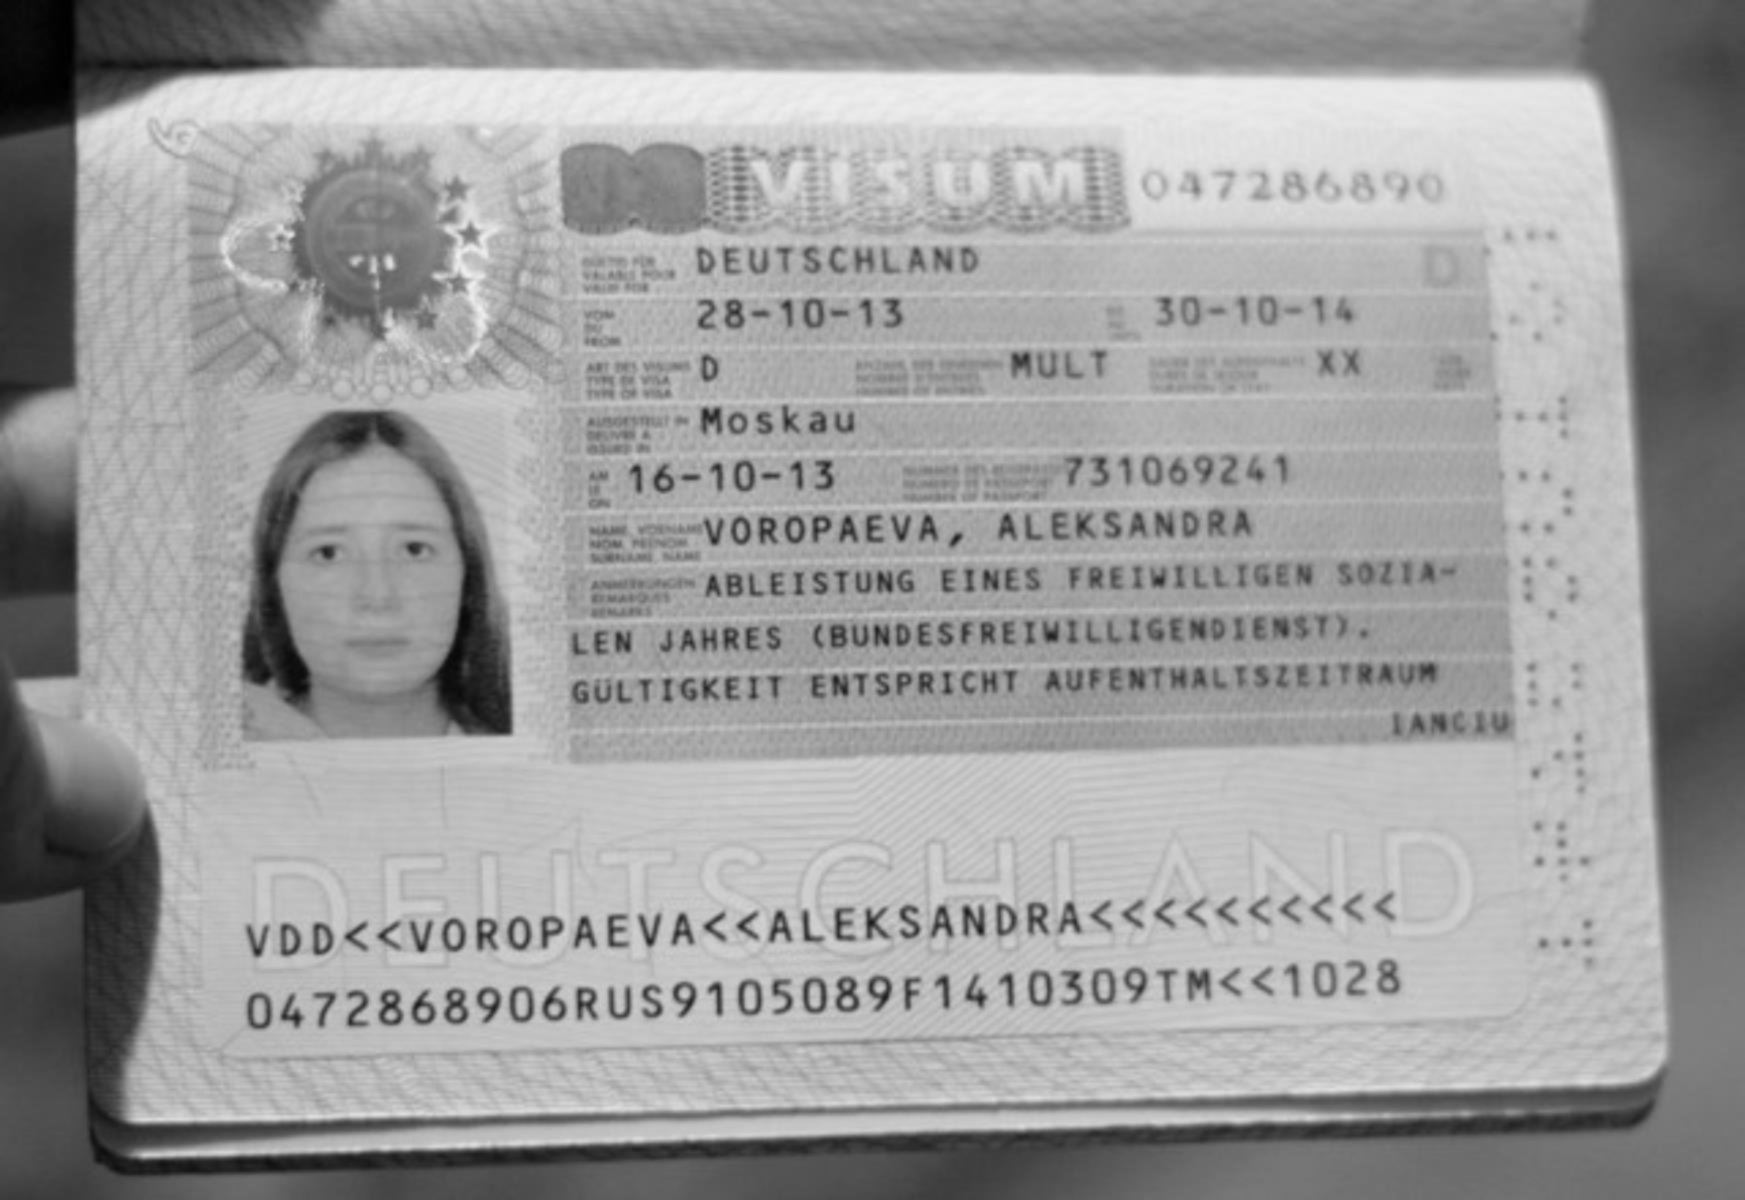

In [183]:
bw = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
bw = cv2.GaussianBlur(bw, (3, 3), 0)
cv2_imshow(bw)

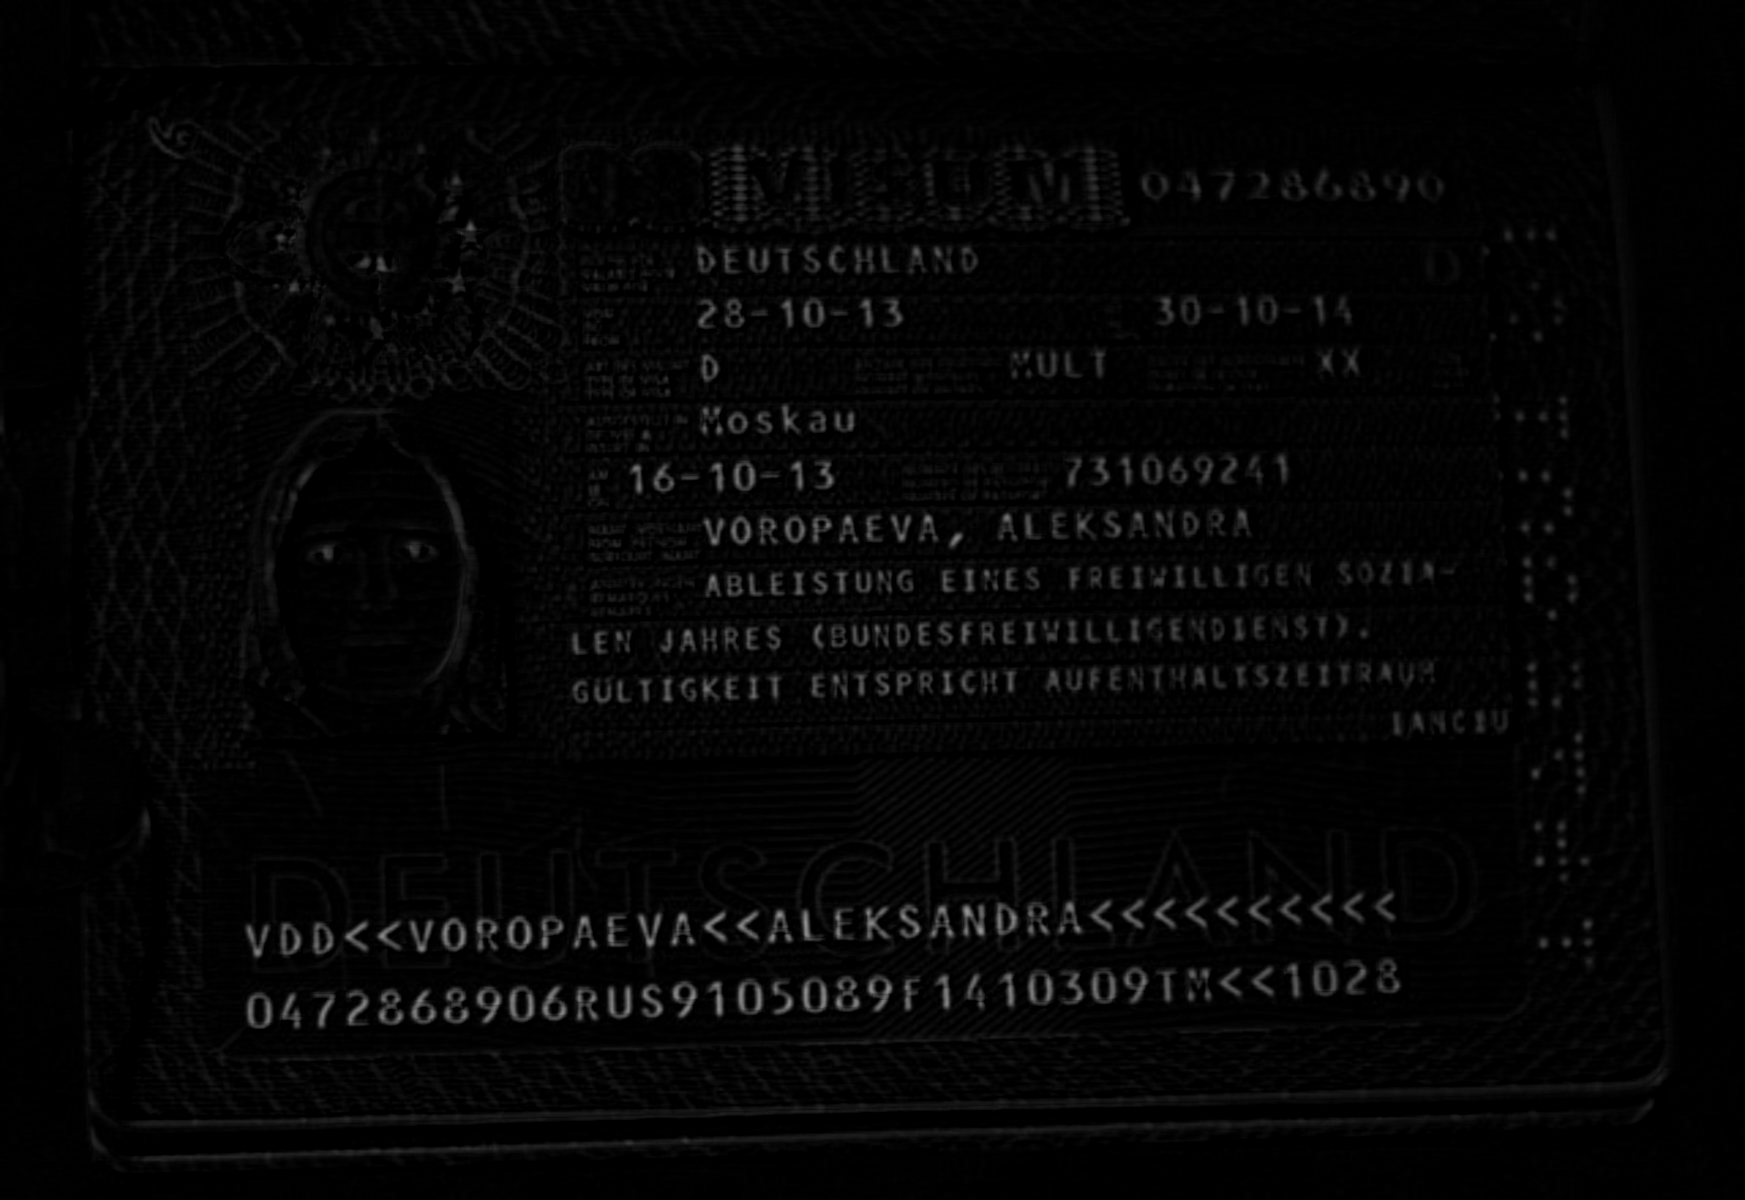

In [184]:
import numpy as np


rectker = cv2.getStructuringElement(0, (14, 6))
blacked = cv2.morphologyEx(bw, cv2.MORPH_BLACKHAT, rectker)
cv2_imshow(blacked)

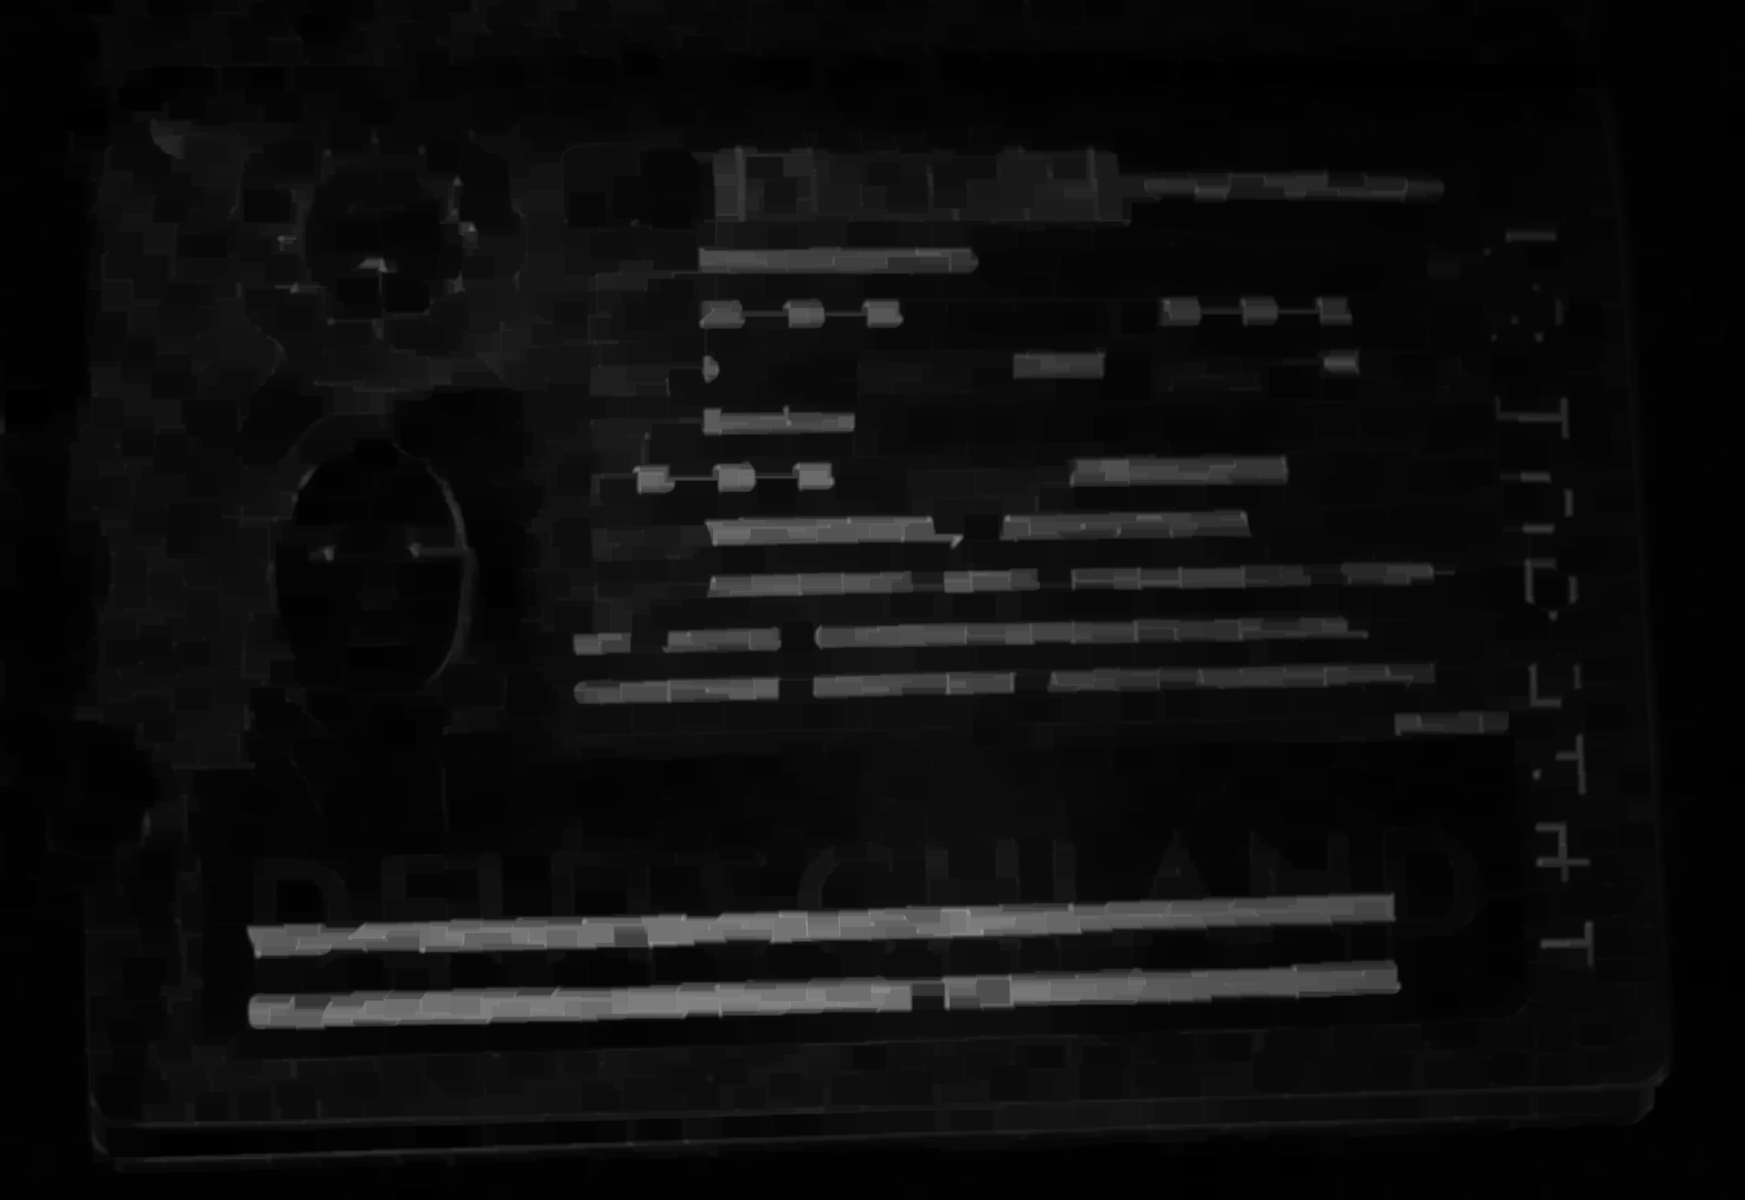

In [185]:
closeker = cv2.getStructuringElement(0, (30,20))
closed = cv2.morphologyEx(blacked, cv2.MORPH_CLOSE, closeker)
cv2_imshow(closed)

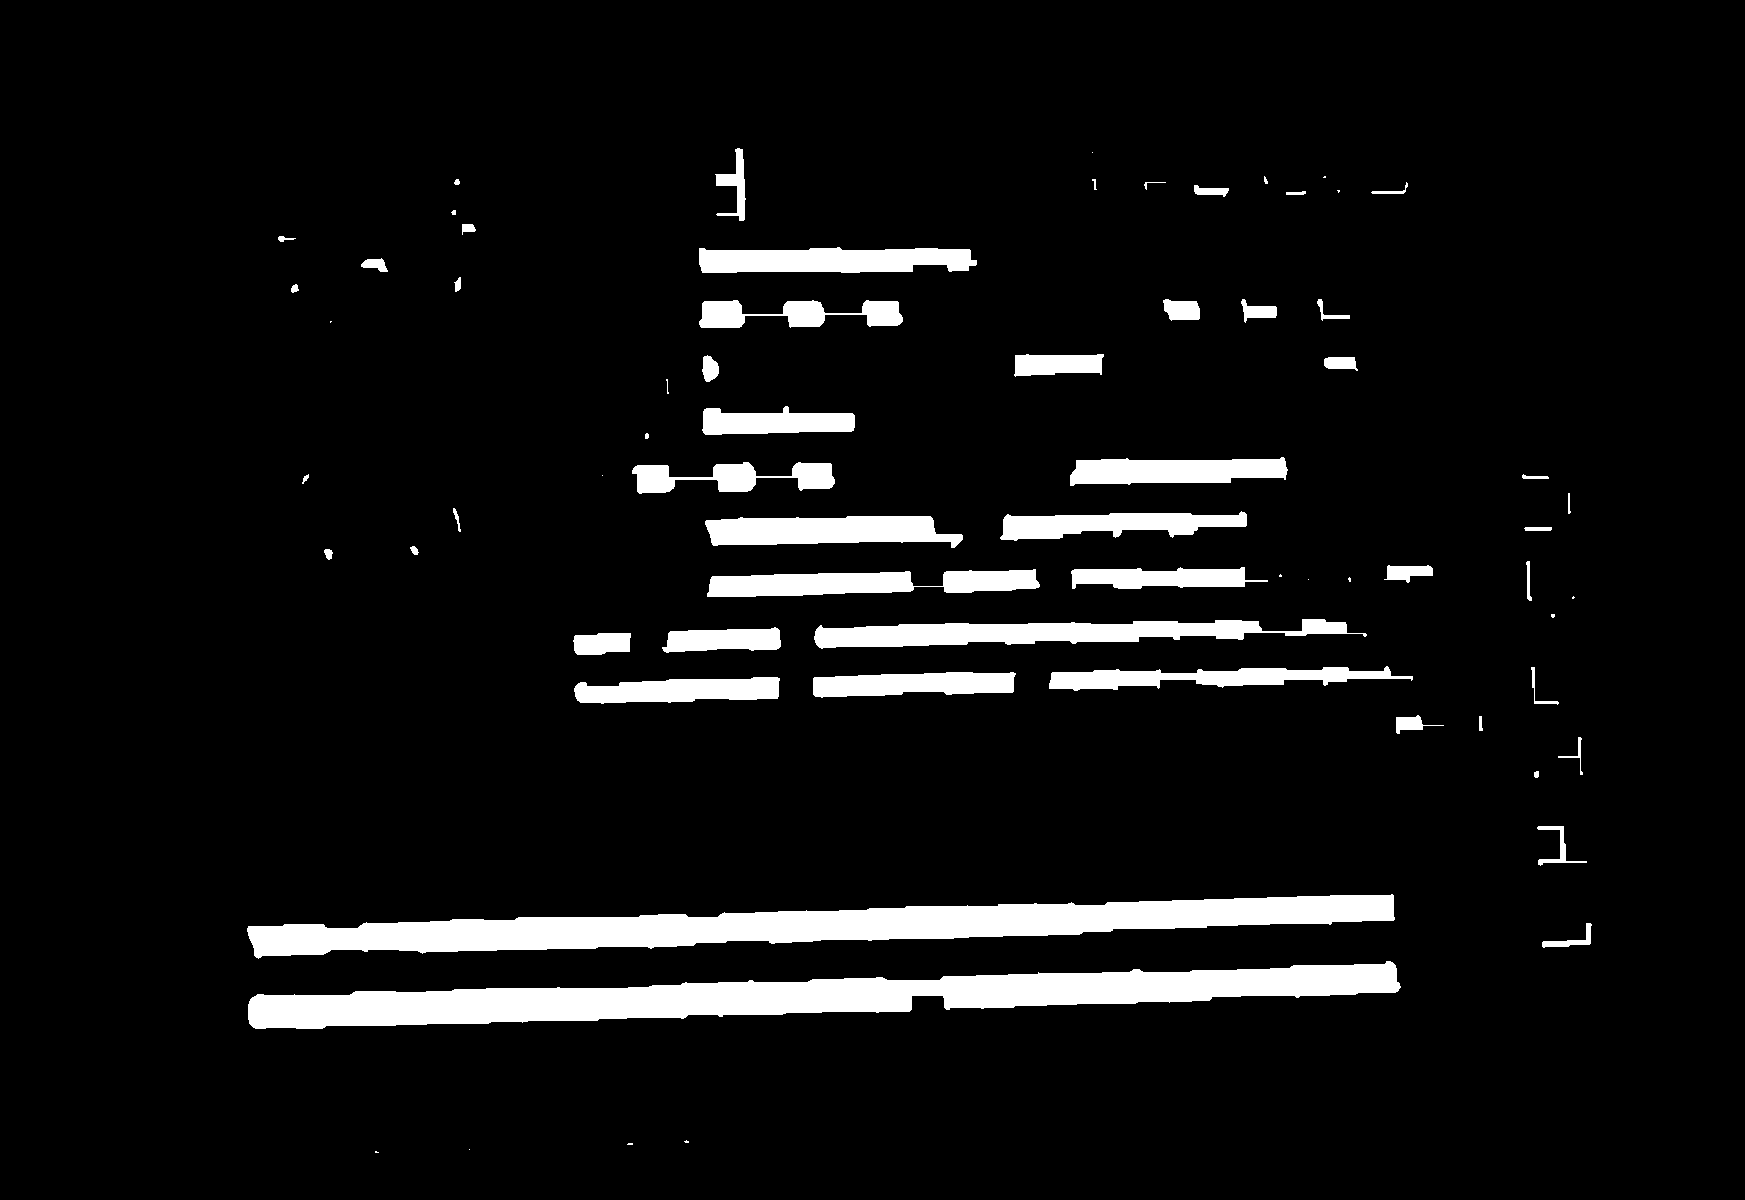

In [187]:
otsu = cv2.threshold(closed, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
cv2_imshow(otsu)

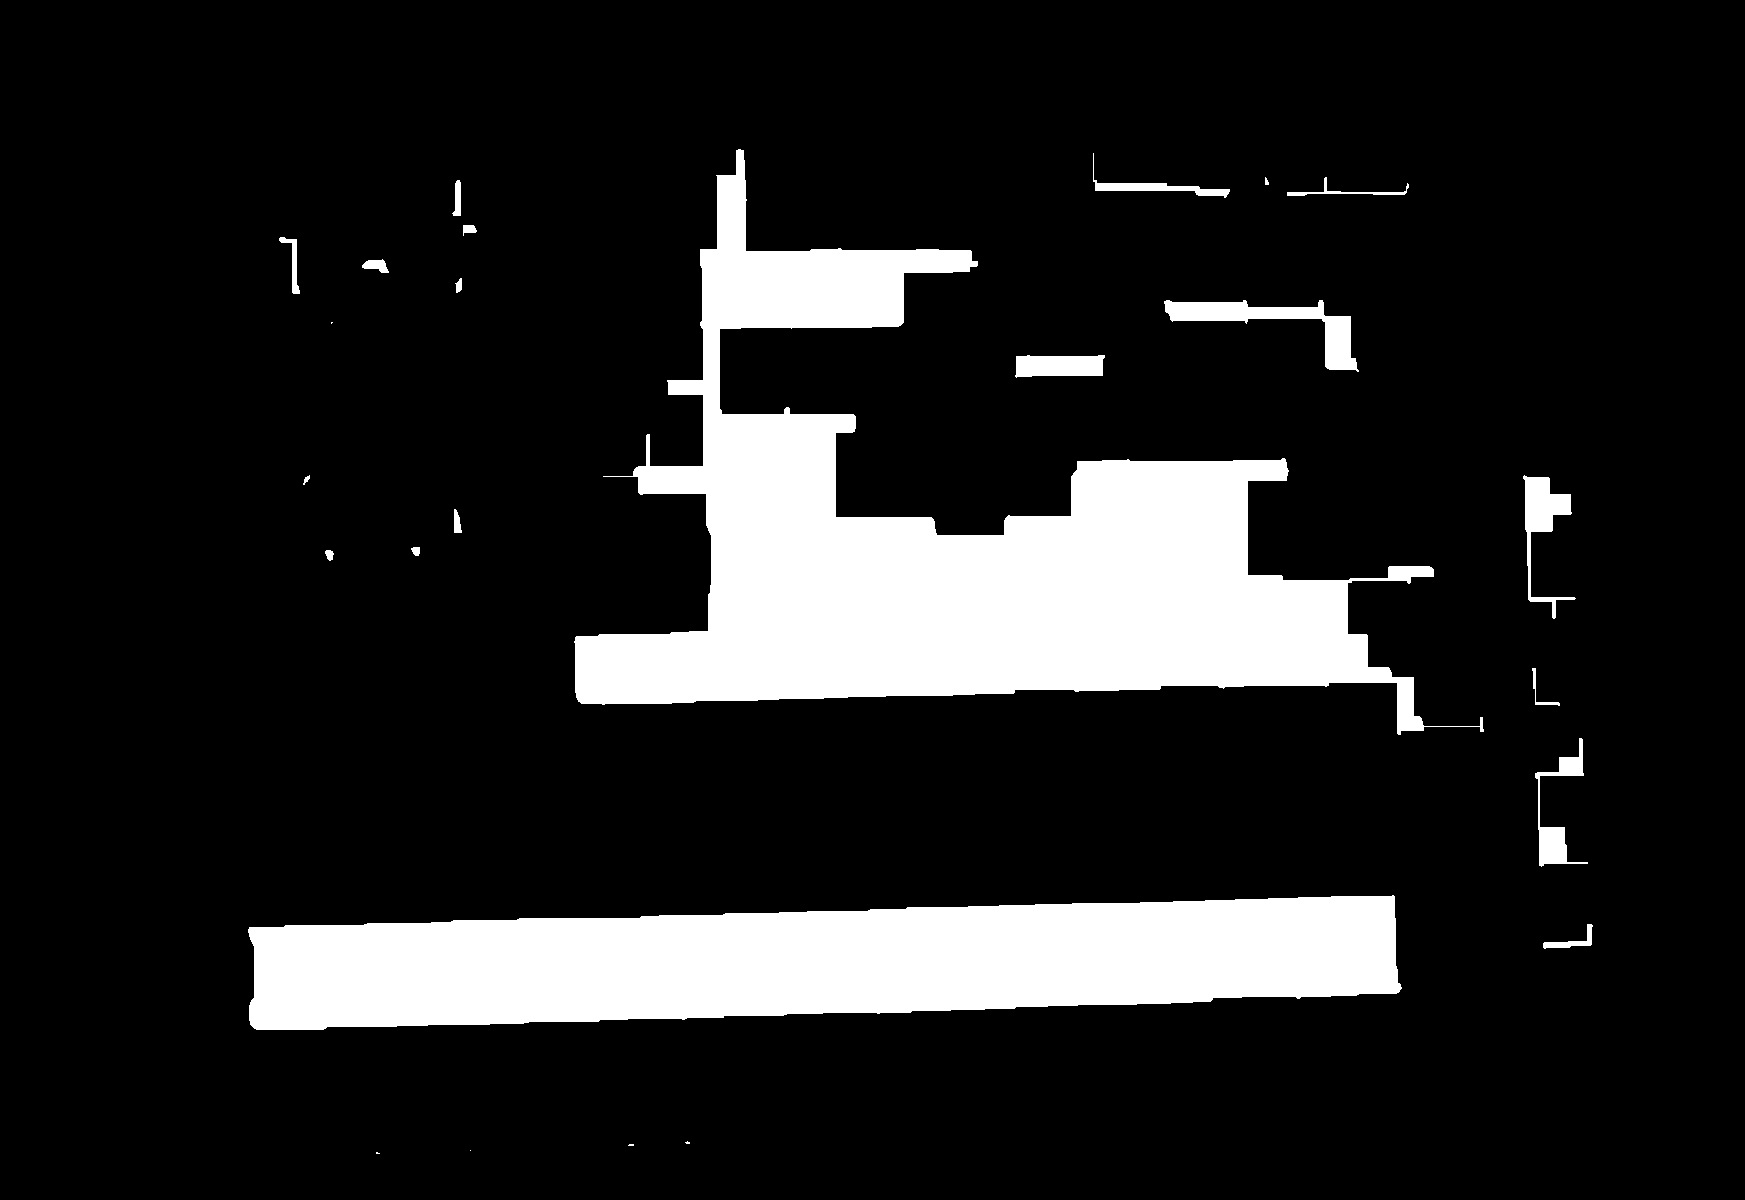

In [191]:
sqker = cv2.getStructuringElement(0,(50,50))
squared = cv2.morphologyEx(otsu, cv2.MORPH_CLOSE, sqker)
cv2_imshow(squared)

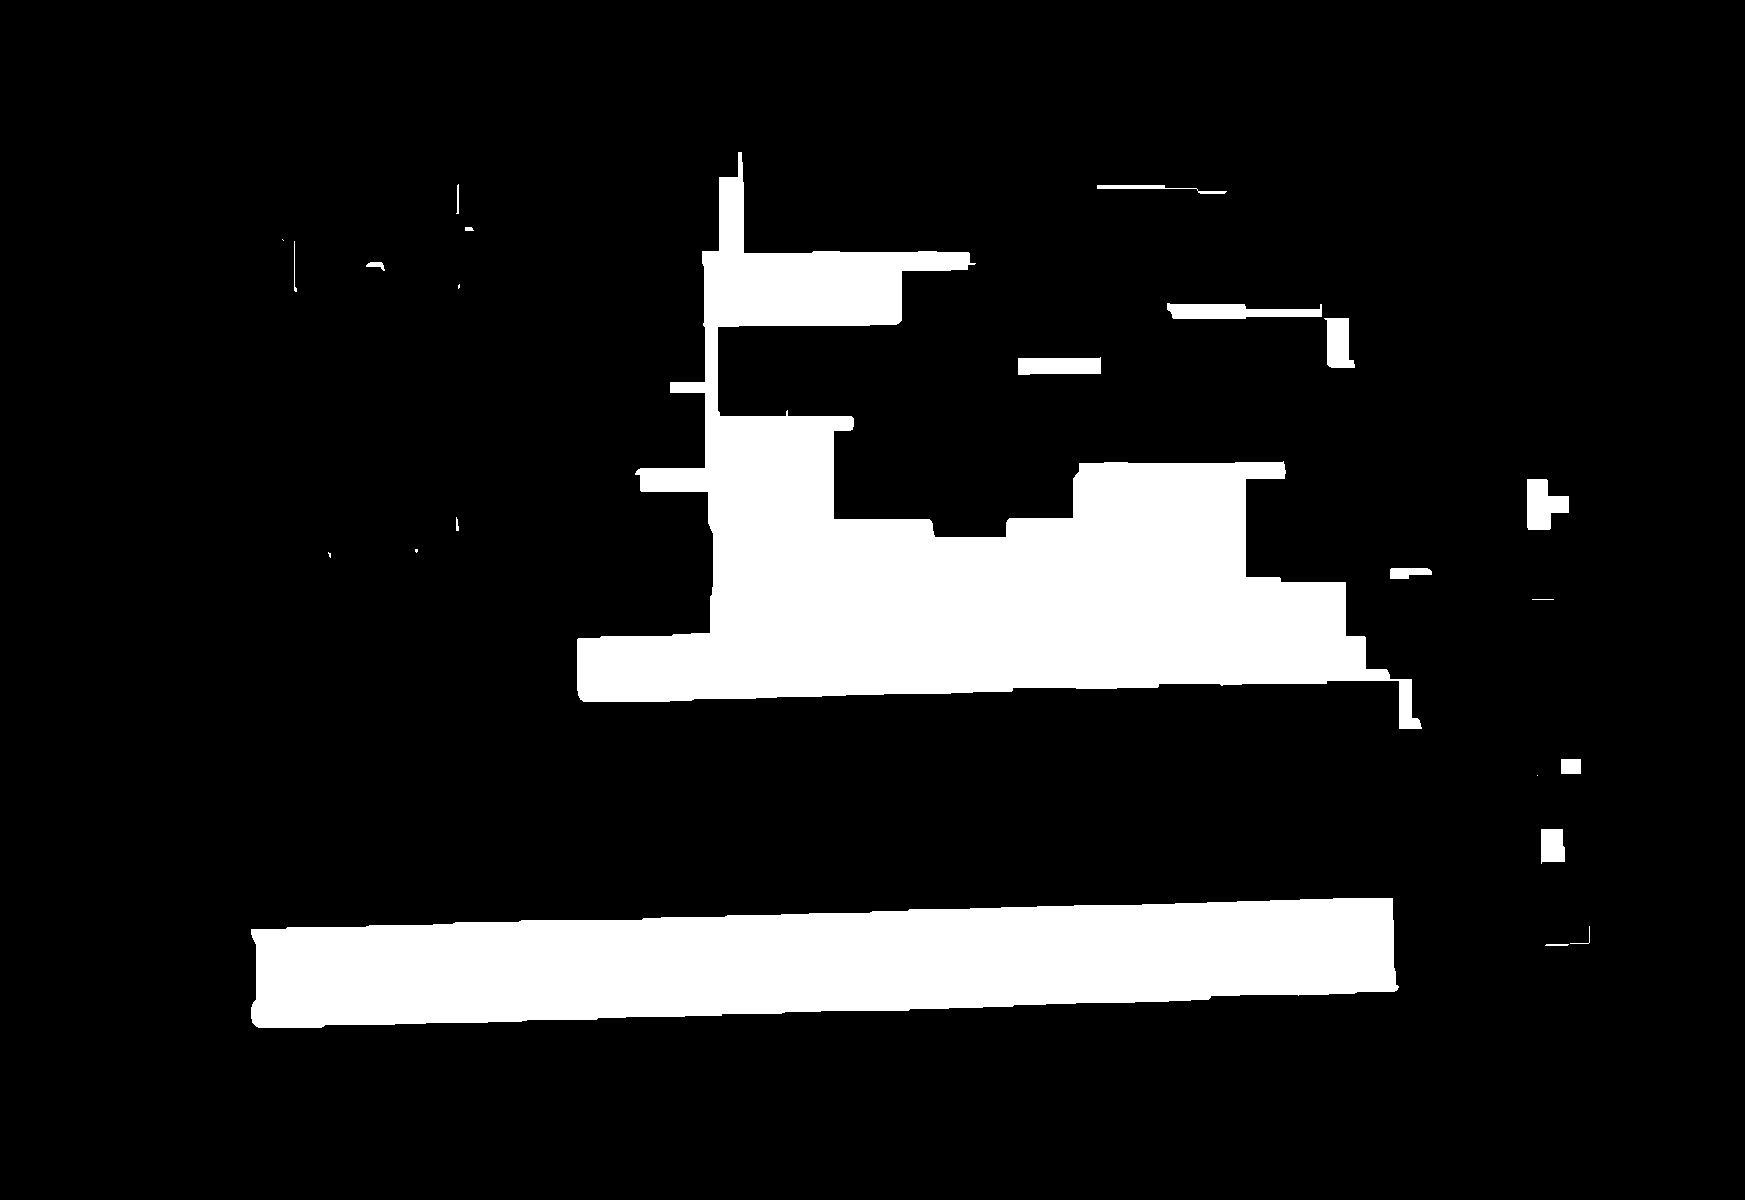

In [192]:
eroded = cv2.erode(squared, cv2.getStructuringElement(0,(5,5)), 3)
cv2_imshow(eroded)

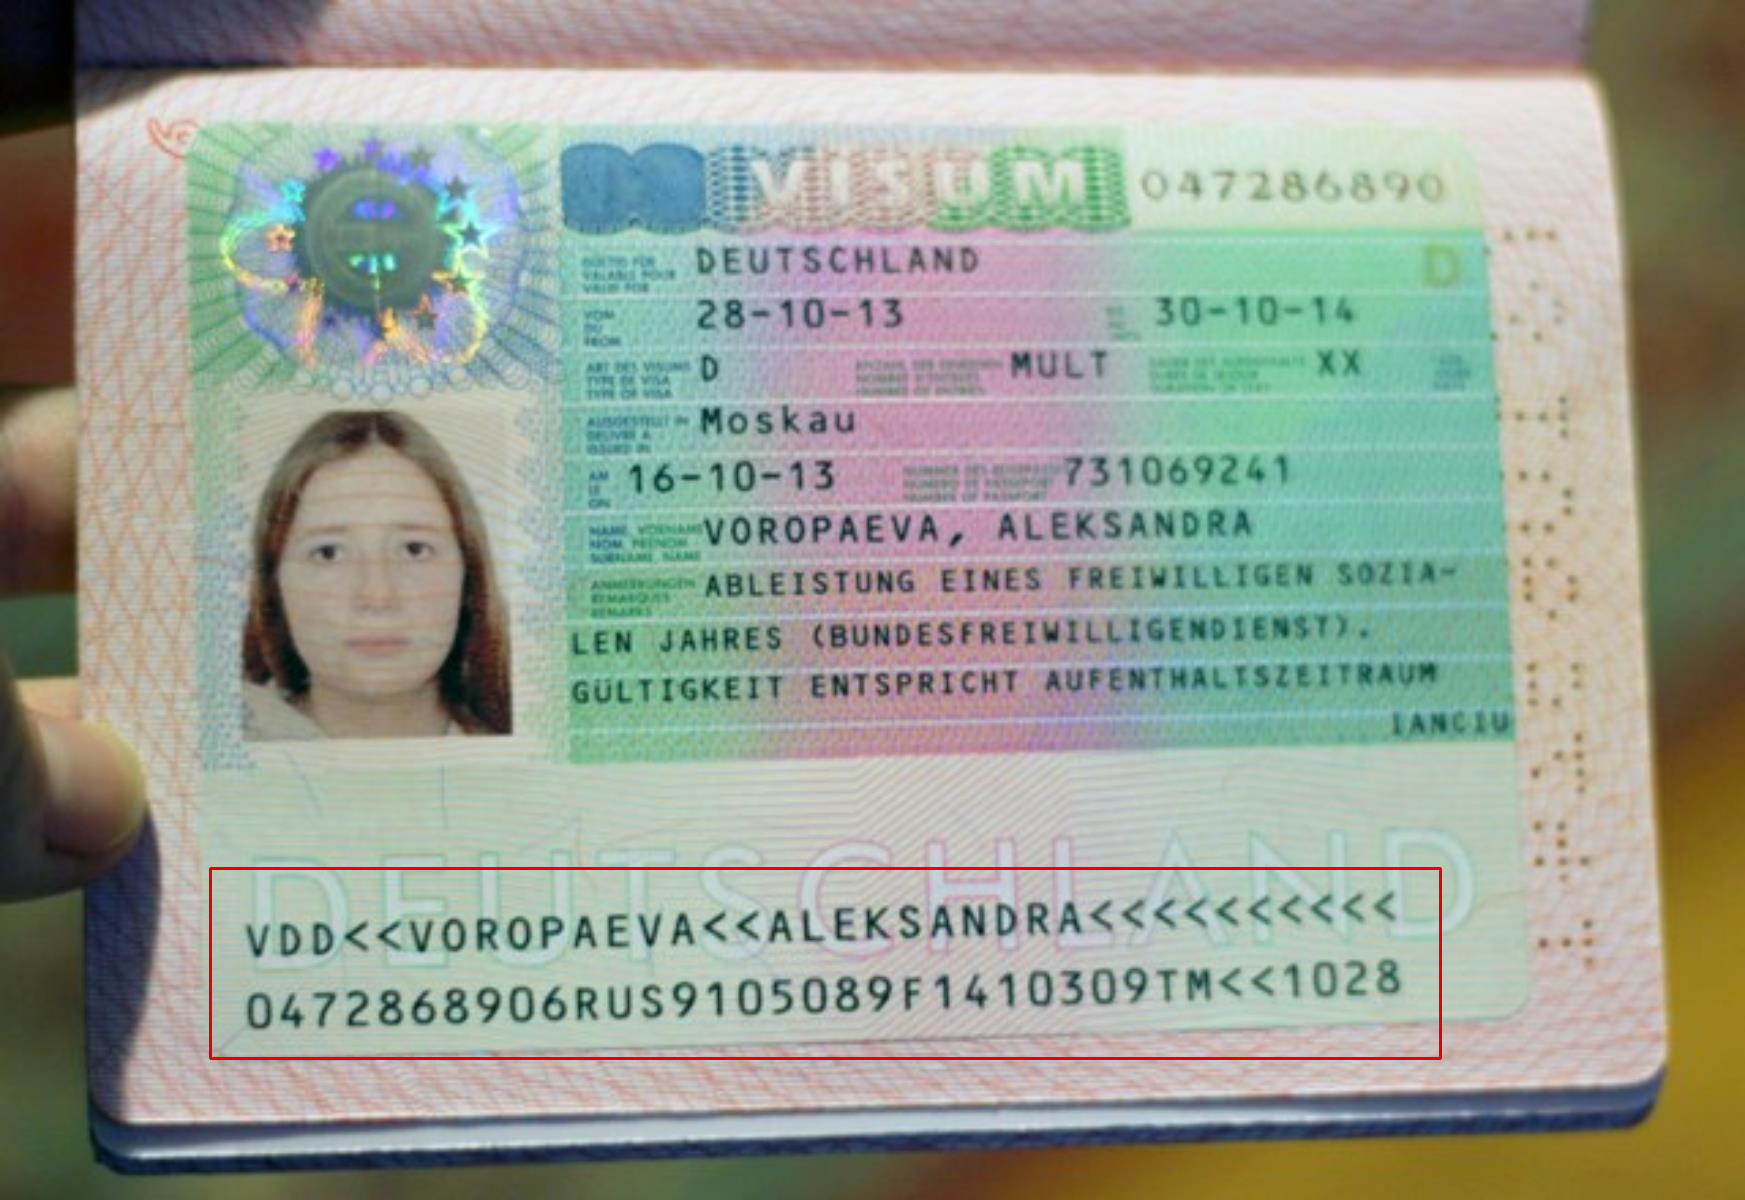

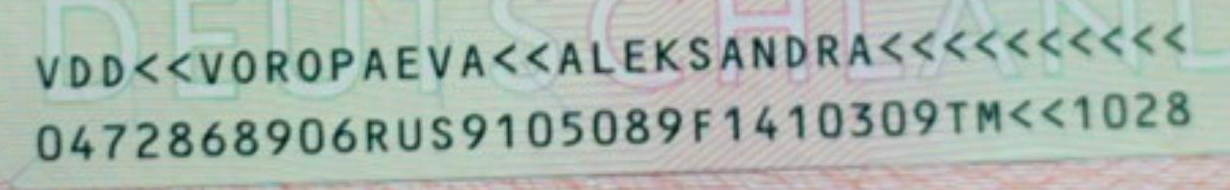

In [194]:
contours = cv2.findContours(eroded.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]
contours = sorted(contours, key=cv2.contourArea, reverse=True) 

for c in contours:
  (x, y, w, h) = cv2.boundingRect(c)
  localWidth = w / float(h)
  globalWidth = w / float(image.shape[1])

  if localWidth > 3 and globalWidth > 0.15:
    epsX = int((x + w) * 0.03)
    epsY = int((y + h) * 0.03)
    x -= epsX
    y -= epsY
    w += 2*epsX
    h += 2*epsY
    rmz = image[y:y + h, x:x + w].copy()
    cv2.rectangle(image, (x, y), (x + w, y + h), (0,0, 228), 2)
    break

cv2_imshow(image)
cv2_imshow(rmz)